In [ ]:
### <font color="red">Import packages </font>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### <font color="red">Read the data into csv file</font>

In [2]:
data =pd.read_csv('merged_data.csv')
#data =pd.read_csv('data/bike_sharing_data/merged_data.csv')
#better use a common path, or move the file into git directory, but do not add to commit

In [3]:
data.head()

,Duration,Start date,End date,Start station number,Member type
0,552,2018-01-01 00:05:06,2018-01-01 00:14:18,31104,Member
1,1282,2018-01-01 00:14:30,2018-01-01 00:35:53,31321,Casual
2,1265,2018-01-01 00:14:53,2018-01-01 00:35:58,31321,Casual
3,578,2018-01-01 00:15:31,2018-01-01 00:25:09,31406,Casual
4,372,2018-01-01 00:18:02,2018-01-01 00:24:15,31618,Member


### <font color="red">Select only the prominant station </font>

In [4]:
data_station_31623=data[data['Start station number']==31623] ##this is the data that we are going to use for EDA
data_station_31623.head()
type(data_station_31623)
data_station_31623.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Member type             object
dtype: object

In [5]:
#data_station_31623=data_station_31623[['Start date', 'Member type']]
data_station_31623=data_station_31623.loc[:,['Duration','Start date', 'Member type']] #df.loc[:, ['C', 'D', 'E']]

In [6]:
sel_station=data_station_31623
sel_station.head()


,Duration,Start date,Member type
45,281,2018-01-01 01:13:43,Member
72,494,2018-01-01 01:49:37,Casual
155,419,2018-01-01 06:41:10,Member
538,608,2018-01-01 13:28:19,Member
600,321,2018-01-01 14:02:33,Member


In [7]:
data_station_31623["Start date"] = pd.to_datetime(data_station_31623["Start date"],format='%Y-%m-%d %H:%M:%S')
sel_station["Start date"] = pd.to_datetime(sel_station["Start date"],format='%Y-%m-%d %H:%M:%S')

In [8]:
data_station_31623['hour of day']=data_station_31623["Start date"].dt.hour

In [10]:
data_station_31623['day of the month']=data_station_31623["Start date"].dt.day

In [39]:
#Note that in Python Monday is 0 unlike Javascript style where Sunday is 0
data_station_31623['day of week']=data_station_31623["Start date"].dt.weekday
sel_station['day of week']=sel_station["Start date"].dt.weekday

#install with pip install holidays
import holidays

holiday_dates_list=[]
#Print all the holidays in US in year 2018, 2019
for ptr in holidays.US(years = 2018).items():
    holiday_dates_list.append(ptr[0])
for ptr in holidays.US(years = 2019).items():
    holiday_dates_list.append(ptr[0]) 
for ptr in holidays.US(years = 2020).items():
    holiday_dates_list.append(ptr[0]) 
us_holidays=tuple(holiday_dates_list)
print(us_holidays)



data_station_31623['is holiday'] = data_station_31623['Start date'].apply(lambda x: 1 if x in us_holidays else 0)
sel_station['is holiday'] = sel_station['Start date'].apply(lambda x: 1 if x in us_holidays else 0)

print(sel_station['is holiday'].value_counts()) # 121805 1600 2018 jan to 2020 feb

(datetime.date(2018, 1, 1), datetime.date(2018, 1, 15), datetime.date(2018, 2, 19), datetime.date(2018, 5, 28), datetime.date(2018, 7, 4), datetime.date(2018, 9, 3), datetime.date(2018, 10, 8), datetime.date(2018, 11, 11), datetime.date(2018, 11, 12), datetime.date(2018, 11, 22), datetime.date(2018, 12, 25), datetime.date(2019, 1, 1), datetime.date(2019, 1, 21), datetime.date(2019, 2, 18), datetime.date(2019, 5, 27), datetime.date(2019, 7, 4), datetime.date(2019, 9, 2), datetime.date(2019, 10, 14), datetime.date(2019, 11, 11), datetime.date(2019, 11, 28), datetime.date(2019, 12, 25), datetime.date(2020, 1, 1), datetime.date(2020, 1, 20), datetime.date(2020, 2, 17), datetime.date(2020, 5, 25), datetime.date(2020, 7, 4), datetime.date(2020, 7, 3), datetime.date(2020, 9, 7), datetime.date(2020, 10, 12), datetime.date(2020, 11, 11), datetime.date(2020, 11, 26), datetime.date(2020, 12, 25))
0    121805
1      1600
Name: is holiday, dtype: int64


In [40]:
data_station_31623['date']=data_station_31623["Start date"].dt.date
sel_station['date']=sel_station["Start date"].dt.date

selected data size: (118473, 9) possible noise: (4932, 9) 
(9583, 9)
(113822, 9)
(1214, 9)
(516, 9)


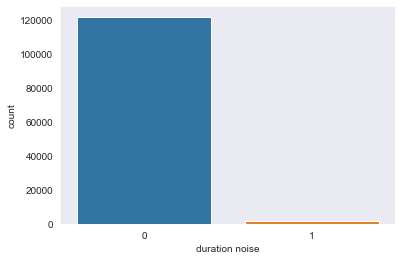

In [46]:
#graph duration more than 1800 and less than equal to 1800 (30 mins)

#sel_station.set_index('Start date', inplace=True)
duration_condition=sel_station['Duration']>1800
likely_noise=sel_station[duration_condition]
sel_data = sel_station[ ~duration_condition]
print("selected data size: %s possible noise: %s " % (sel_data.shape, likely_noise.shape,))

# print(''.join(sel_data.shape) + ' ' + ''.join( sel_data.shape.shape()))



dur=3600

sel_station['duration noise'] = sel_station['Duration'].apply(lambda x: 1 if int(x)>dur else 0)
#print(sel_station.head())
casual_=sel_station[sel_station['Member type']=='Casual'];
member_=sel_station[sel_station['Member type']=='Member'];

print(casual_.shape)
print(member_.shape)
print(casual_[casual_['Duration']>dur].shape)
print(member_[member_['Duration']>dur].shape)

from collections import Counter
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import seaborn as sns
sns.set_style("dark")

# plot and save with seaborn
sns.set_style("dark")
countplot_all = sns.countplot(x="duration noise", data=sel_station);
fig_all = countplot_all.get_figure()
fig_all.savefig('durations_segregation.png')




604.4159368776146
773.2461161567877
779.7346978941154
703.7115135834412


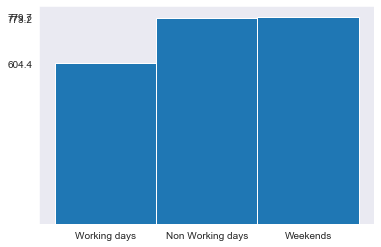

In [71]:
#print(sel_station.shape) #123405, 9)
sel_station.head()
#isweekday=sel_station['day of week'] in [0,1,2,3,4]
#notholiday=sel_station['is holiday'] == 0
#workingday=isweekday and notholida 
workingday=sel_station[(sel_station['day of week'] <5) & (sel_station['is holiday']==0) & (sel_station['duration noise']==0)]
#(104939, 9)
print(workingday['Duration'].mean()) #sum: 63426804 604.4159368776146

nonworkingday=sel_station[((sel_station['day of week'] >=5) | (sel_station['is holiday']==1) ) & (sel_station['duration noise']==0)]
print(nonworkingday['Duration'].mean()) #1063.3015772870663

weekends=sel_station[(sel_station['day of week'] >=5) & (sel_station['duration noise']==0)]
print(weekends['Duration'].mean()) #1063.3015772870663

holidays=sel_station[(sel_station['is holiday']==1) & (sel_station['duration noise']==0)]
print(holidays['Duration'].mean()) #1063.3015772870663




import numpy as np                                                               
import matplotlib.pyplot as plt

top=[('Working days',workingday['Duration'].mean()),('Non Working days',nonworkingday['Duration'].mean()),('Weekends',weekends['Duration'].mean())]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

plt.savefig('type_of_day_duration_3600_sec.png')






687.1315369581843
1079.973982159195
1096.669928490779
935.7575


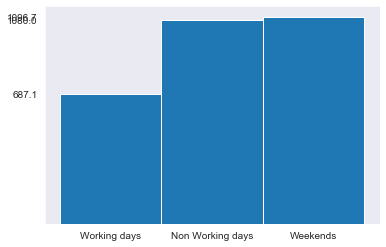

In [72]:
workingday_all=sel_station[(sel_station['day of week'] <5) & (sel_station['is holiday']==0)]
nonworkingday_all=sel_station[(sel_station['day of week'] >=5) | (sel_station['is holiday']==1)]
weekends_all=sel_station[(sel_station['day of week'] >=5)]
holidays_all=sel_station[(sel_station['is holiday']==1)]
print('\n')
print(workingday_all['Duration'].mean()) #1063.3015772870663
print(nonworkingday_all['Duration'].mean()) #1063.3015772870663
print(weekends_all['Duration'].mean()) #1063.3015772870663
print(holidays_all['Duration'].mean()) #1063.3015772870663

top=[('Working days',workingday_all['Duration'].mean()),('Non Working days',nonworkingday_all['Duration'].mean()),('Weekends',weekends_all['Duration'].mean())]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

plt.savefig('type_of_day_duration_all.png')

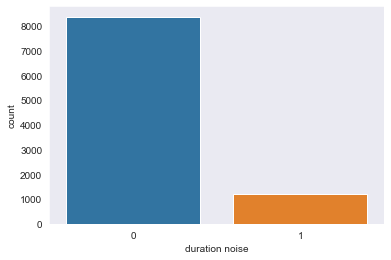

In [215]:
countplot_casual= sns.countplot(x="duration noise", data=casual_);
fig_casual = countplot_casual.get_figure()
fig_casual.savefig('durations_segregation_casual.png')



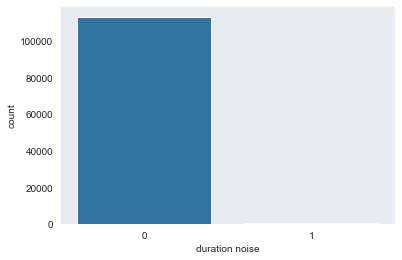

In [214]:
countplot_mem = sns.countplot(x="duration noise", data=member_);
fig_mem= countplot_mem.get_figure()
fig_mem.savefig('durations_segregation_member.png')


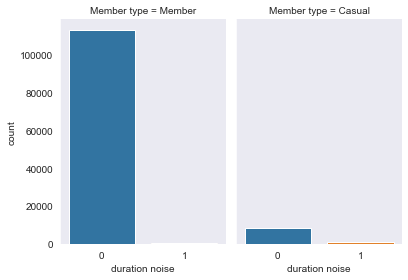

In [213]:
g = sns.catplot(x="duration noise", col="Member type",
                data=sel_station, kind="count",
                height=4, aspect=.7);

g.savefig('cat_durations_segregation.png')

In [32]:
count=pd.DataFrame(data_station_31623.groupby(['date','hour of day','Member type', 'day of week', 'is holiday'])\
                   ['hour of day'].count().rename('number of users'))

In [33]:
count=count.reset_index()

In [34]:
casual_hourly=count[count['Member type']=="Casual"][['date','hour of day','number of users','day of week', 'is holiday']]

In [35]:
casual_hourly.head()

,date,hour of day,number of users,day of week,is holiday
0,2018-01-01,1,1,0,1
6,2018-01-01,16,1,0,1
17,2018-01-02,8,1,1,0
36,2018-01-03,7,1,2,0
39,2018-01-03,9,1,2,0


In [36]:
casual_hourly['number of users'].value_counts()

1     2155
2     1066
3      503
4      295
5      156
6       77
7       60
8       52
9       22
10      12
12       9
11       7
13       2
Name: number of users, dtype: int64

In [37]:
casual_hourly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4416 entries, 0 to 17689
Data columns (total 5 columns):
date               4416 non-null object
hour of day        4416 non-null int64
number of users    4416 non-null int64
day of week        4416 non-null int64
is holiday         4416 non-null int64
dtypes: int64(4), object(1)
memory usage: 207.0+ KB


In [38]:
casual_hourly.columns

Index(['date', 'hour of day', 'number of users', 'day of week', 'is holiday'], dtype='object')

In [39]:
member_hourly=count[count['Member type']=="Member"][['date','hour of day','number of users', 'day of week', 'is holiday']]

In [41]:
member_hourly.head()

,date,hour of day,number of users,day of week,is holiday
1,2018-01-01,1,1,0,1
2,2018-01-01,6,1,0,1
3,2018-01-01,13,1,0,1
4,2018-01-01,14,1,0,1
5,2018-01-01,15,3,0,1


In [42]:
member_hourly=member_hourly.reset_index().drop('index',axis=1)

In [43]:
from datetime import timedelta

In [44]:
member_hourly['date_time']=None
for i in range(len(member_hourly)):
    member_hourly['date_time'][i]=timedelta(hours=int(member_hourly['hour of day'].iloc[i]))+pd.to_datetime(member_hourly['date'].iloc[i])
    

In [45]:
member_hourly=member_hourly[['date_time',"number of users"]]

In [46]:
member_hourly.head()

,date_time,number of users
0,2018-01-01 01:00:00,1
1,2018-01-01 06:00:00,1
2,2018-01-01 13:00:00,1
3,2018-01-01 14:00:00,1
4,2018-01-01 15:00:00,3


In [47]:
casual_hourly=casual_hourly.reset_index().drop('index',axis=1)

In [48]:
casual_hourly.index

RangeIndex(start=0, stop=4416, step=1)

In [49]:
casual_hourly['date_time']=None
for i in range(len(casual_hourly)):
    casual_hourly['date_time'][i]=timedelta(hours=int(casual_hourly['hour of day'].iloc[i]))+pd.to_datetime(casual_hourly['date'].iloc[i])

In [50]:
casual_hourly=casual_hourly[['date_time','number of users']]

In [51]:
casual_hourly.head()

,date_time,number of users
0,2018-01-01 01:00:00,1
1,2018-01-01 16:00:00,1
2,2018-01-02 08:00:00,1
3,2018-01-03 07:00:00,1
4,2018-01-03 09:00:00,1


In [52]:
casual_hourly.shape

(4416, 2)

In [54]:
casual_hourly.to_csv('casual_hourly.csv',index=False)

In [55]:
member_hourly.head()

,date_time,number of users
0,2018-01-01 01:00:00,1
1,2018-01-01 06:00:00,1
2,2018-01-01 13:00:00,1
3,2018-01-01 14:00:00,1
4,2018-01-01 15:00:00,3


In [56]:
member_hourly.to_csv('member_hourly.csv',index=False)

In [57]:
member_hourly.shape

(13277, 2)

In [58]:
count_by_date=pd.DataFrame(data_station_31623.groupby(['date','Member type'])['hour of day'].count().rename('number of users'))

In [59]:
count_by_date=count_by_date.reset_index()

In [60]:
count_by_date.head()

,date,Member type,number of users
0,2018-01-01,Casual,2
1,2018-01-01,Member,19
2,2018-01-02,Casual,1
3,2018-01-02,Member,125
4,2018-01-03,Casual,6


In [61]:
casual_daily=count_by_date[count_by_date['Member type']=="Casual"][['date','number of users']]

In [62]:
member_daily=count_by_date[count_by_date['Member type']=="Member"][['date','number of users']]

In [63]:
casual_daily.head()

,date,number of users
0,2018-01-01,2
2,2018-01-02,1
4,2018-01-03,6
8,2018-01-06,1
11,2018-01-08,7


In [64]:
casual_daily.shape

(724, 2)

In [66]:
casual_daily.to_csv('casual_daily.csv',index=False)

In [67]:
member_daily.head()

,date,number of users
1,2018-01-01,19
3,2018-01-02,125
5,2018-01-03,144
6,2018-01-04,70
7,2018-01-05,84


In [68]:
member_daily.shape

(760, 2)

In [69]:
member_daily.to_csv('member_daily.csv',index=False)